Epoch 10/100, Loss: 2.249438524246216
Epoch 20/100, Loss: 1.3901599645614624
Epoch 30/100, Loss: 0.8694143891334534
Epoch 40/100, Loss: 0.553587794303894
Epoch 50/100, Loss: 0.36180824041366577
Epoch 60/100, Loss: 0.24512650072574615
Epoch 70/100, Loss: 0.1739148646593094
Epoch 80/100, Loss: 0.1302402764558792
Epoch 90/100, Loss: 0.10324779152870178
Epoch 100/100, Loss: 0.08636733889579773


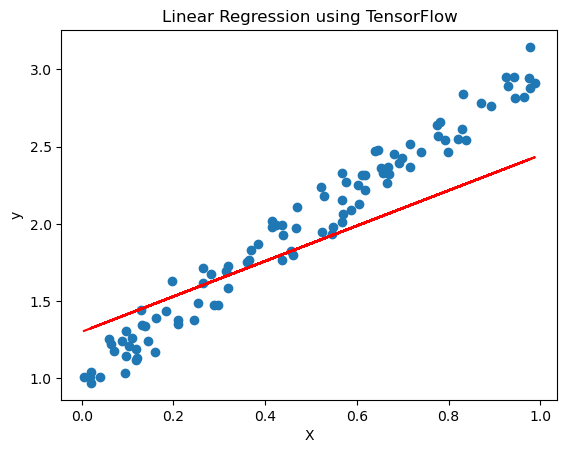

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1).astype(np.float32)  # Cast X to float32
y = 2 * X + 1 + np.random.randn(100, 1) * 0.1  # Linear relationship with noise

# Define the model
class LinearRegression(tf.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.W = tf.Variable(tf.random.normal([1, 1]), name='weight')
        self.b = tf.Variable(tf.zeros([1]), name='bias')

    def __call__(self, x):
        return tf.matmul(x, self.W) + self.b

# Define loss function
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define optimization algorithm
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Instantiate the model
model = LinearRegression()

# Training loop
epochs = 100
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model(X)
        current_loss = loss(y, predictions)
    gradients = tape.gradient(current_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {current_loss.numpy()}')

# Plot the data and the learned line
plt.scatter(X, y)
plt.plot(X, model(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using TensorFlow')
plt.show()


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
boston = load_boston()
X, y = boston.data, boston.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class LinearRegression(tf.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.W = tf.Variable(tf.random.normal([X.shape[1], 1]), name='weight')
        self.b = tf.Variable(tf.zeros([1]), name='bias')

    def __call__(self, x):
        return tf.matmul(x, self.W) + self.b

# Define loss function
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define optimization algorithm
optimizer = tf.optimizers.Adam(learning_rate=0.01)  # Using Adam optimizer

# Instantiate the model
model = LinearRegression()

# Training loop
epochs = 100
batch_size = 32
num_batches = len(X_train) // batch_size

for epoch in range(epochs):
    for i in range(num_batches):
        start = i * batch_size
        end = (i + 1) * batch_size
        X_batch = X_train[start:end]
        y_batch = y_train[start:end]
        
        with tf.GradientTape() as tape:
            predictions = model(X_batch)
            current_loss = loss(y_batch, predictions)
        gradients = tape.gradient(current_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {current_loss.numpy()}')

# Evaluate the model
test_predictions = model(X_test)
test_loss = loss(y_test, test_predictions)
print(f'Test Loss: {test_loss.numpy()}')

# Plot predicted vs actual values for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [4]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
housing = fetch_california_housing()

# Split the dataset into features (X) and target (y)
X = housing.data
y = housing.target.reshape(-1, 1)  # Reshape to make it a column vector

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)



Epoch 1/100
413/413 [==============================] - 2s 2ms/step - loss: 5.9983 - val_loss: 4.5893
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 3.8198 - val_loss: 2.9895
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 2.5479 - val_loss: 2.0233
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 1.7698 - val_loss: 1.4334
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 1.2947 - val_loss: 1.0818
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 1.0158 - val_loss: 0.8804
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 0.8534 - val_loss: 0.7672
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 0.7605 - val_loss: 0.7043
Epoch 9/100
413/413 [==============================] - 1s 2ms/step - loss: 0.7040 - val_loss: 0.6658
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6660 - val_lo

Epoch 1/10
413/413 [==============================] - 2s 3ms/step - loss: 5.0103 - val_loss: 3.8850
Epoch 2/10
413/413 [==============================] - 1s 2ms/step - loss: 3.1264 - val_loss: 2.5131
Epoch 3/10
413/413 [==============================] - 1s 2ms/step - loss: 2.0471 - val_loss: 1.6836
Epoch 4/10
413/413 [==============================] - 1s 2ms/step - loss: 1.3788 - val_loss: 1.1666
Epoch 5/10
413/413 [==============================] - 1s 2ms/step - loss: 0.9712 - val_loss: 0.8595
Epoch 6/10
413/413 [==============================] - 1s 2ms/step - loss: 0.7390 - val_loss: 0.6924
Epoch 7/10
413/413 [==============================] - 1s 2ms/step - loss: 0.6179 - val_loss: 0.6102
Epoch 8/10
413/413 [==============================] - 1s 2ms/step - loss: 0.5618 - val_loss: 0.5745
Epoch 9/10
413/413 [==============================] - 1s 2ms/step - loss: 0.5381 - val_loss: 0.5611
Epoch 10/10
129/129 [==============================] - 0s 2ms/step - loss: 0.5656
Test Loss: 0.56559

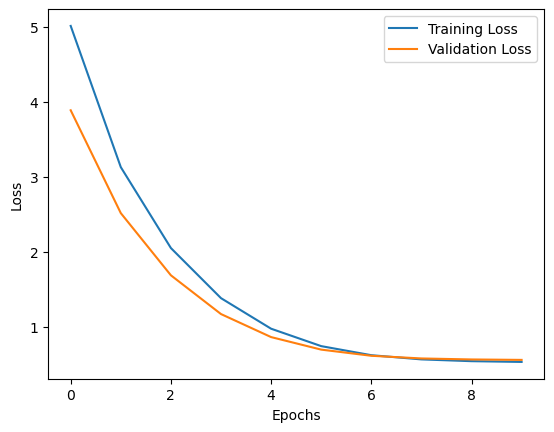

129/129 [==============================] - 0s 1ms/step


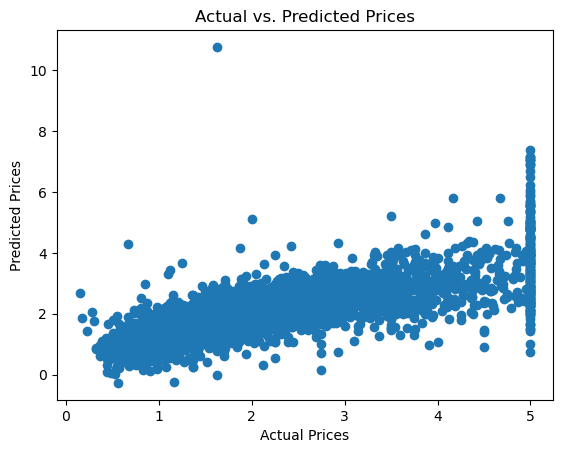

In [5]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
housing = fetch_california_housing()

# Split the dataset into features (X) and target (y)
X = housing.data
y = housing.target.reshape(-1, 1)  # Reshape to make it a column vector

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test)

# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


Epoch 1/10
9/9 [==============================] - 1s 30ms/step - loss: 31412.2656 - val_loss: 22474.9785
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 31404.5820 - val_loss: 22472.8926
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 31396.9688 - val_loss: 22470.8340
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 31389.6055 - val_loss: 22468.7402
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 31381.8398 - val_loss: 22466.7285
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 31375.0820 - val_loss: 22464.6602
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 31367.5742 - val_loss: 22462.6660
Epoch 8/10
9/9 [==============================] - 0s 8ms/step - loss: 31360.2832 - val_loss: 22460.5703
Epoch 9/10
9/9 [==============================] - 0s 8ms/step - loss: 31352.8945 - val_loss: 22458.5137
Epoch 10/10
3/3 [==============================] - 0s 8ms/step

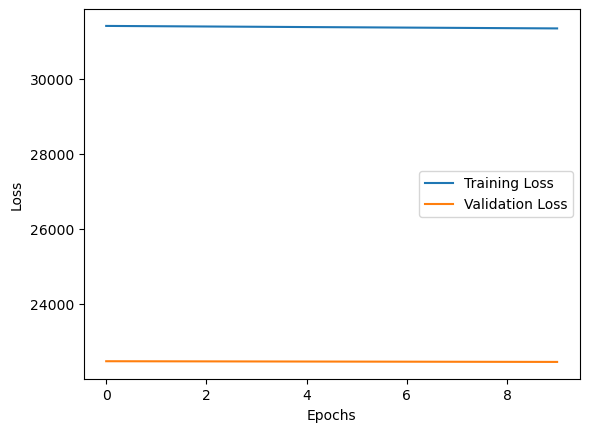

3/3 [==============================] - 0s 6ms/step


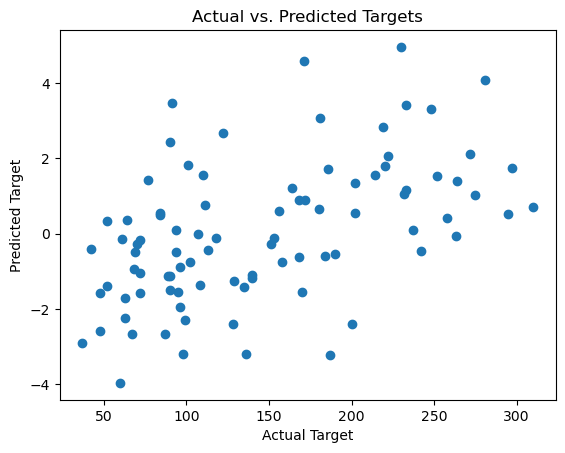

In [7]:
import tensorflow as tf
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
diabetes = load_diabetes()

# Split the dataset into features (X) and target (y)
X = diabetes.data
y = diabetes.target.reshape(-1, 1)  # Reshape to make it a column vector

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test)

# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Targets')
plt.show()


Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 627.4333 - val_loss: 566.2458
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 625.9467 - val_loss: 565.2560
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 624.5804 - val_loss: 564.2812
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 623.1731 - val_loss: 563.3513
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 621.8760 - val_loss: 562.3839
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 620.3939 - val_loss: 561.4194
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 618.9976 - val_loss: 560.4578
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 617.6797 - val_loss: 559.5569
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 616.2792 - val_loss: 558.5753
Epoch 10/100
11/11 [==============================] - 0s 8ms/step - lo

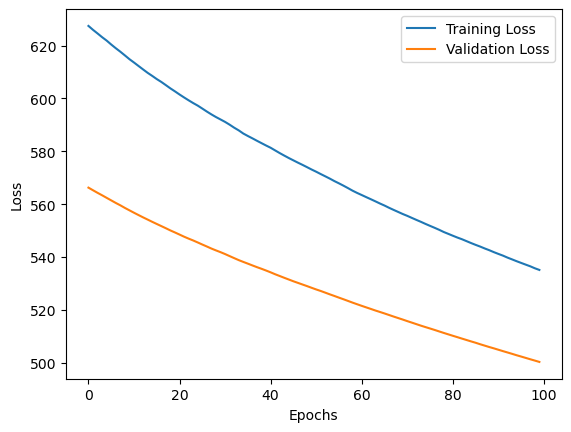

4/4 [==============================] - 0s 2ms/step


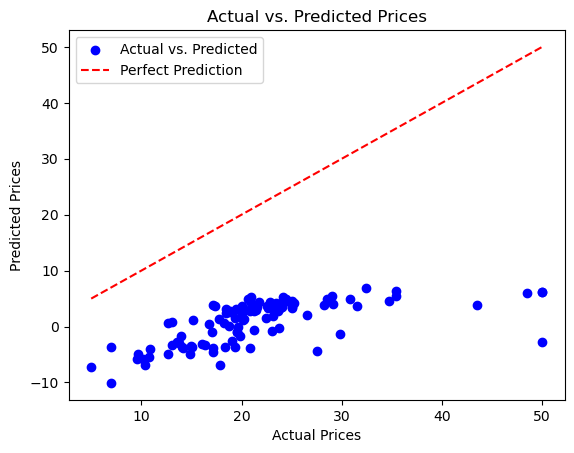

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Split the dataset into features (X) and target (y)
X = data.drop('MEDV', axis=1).values
y = data['MEDV'].values.reshape(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test)

# Plot actual vs. predicted values with different colors
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()


Epoch 1/100
413/413 [==============================] - 2s 3ms/step - loss: 4.8779 - val_loss: 3.8969
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 3.0995 - val_loss: 2.4929
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 2.0072 - val_loss: 1.6408
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 1.3389 - val_loss: 1.1281
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 0.9397 - val_loss: 0.8303
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.7151 - val_loss: 0.6699
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5996 - val_loss: 0.5936
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5483 - val_loss: 0.5627
Epoch 9/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5281 - val_loss: 0.5518
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5211 - val_lo

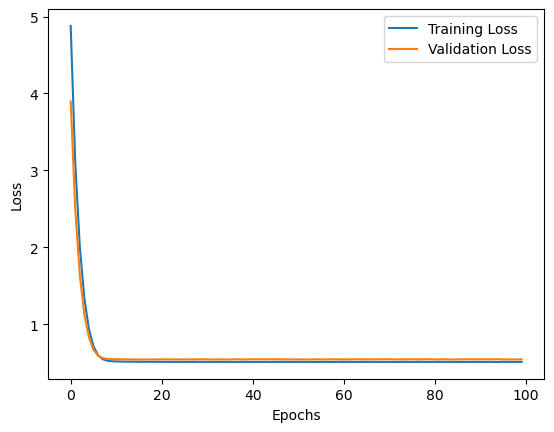

129/129 [==============================] - 0s 1ms/step


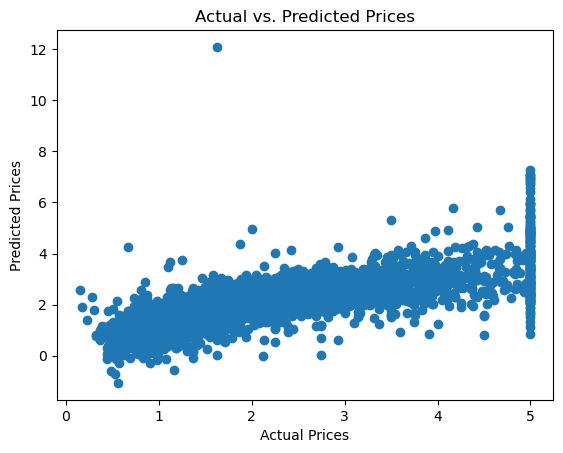

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
housing = fetch_california_housing()

# Split the dataset into features (X) and target (y)
X = housing.data
y = housing.target.reshape(-1, 1)  # Reshape to make it a column vector

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test)

# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


Epoch 1/100
413/413 [==============================] - 2s 2ms/step - loss: 4.4881 - val_loss: 3.6272
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 2.8943 - val_loss: 2.3956
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 1.9306 - val_loss: 1.6202
Epoch 4/100
413/413 [==============================] - 1s 3ms/step - loss: 1.3149 - val_loss: 1.1306
Epoch 5/100
413/413 [==============================] - 1s 3ms/step - loss: 0.9309 - val_loss: 0.8378
Epoch 6/100
413/413 [==============================] - 1s 3ms/step - loss: 0.7105 - val_loss: 0.6779
Epoch 7/100
413/413 [==============================] - 1s 3ms/step - loss: 0.5978 - val_loss: 0.6035
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5476 - val_loss: 0.5720
Epoch 9/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5285 - val_loss: 0.5600
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5223 - val_lo

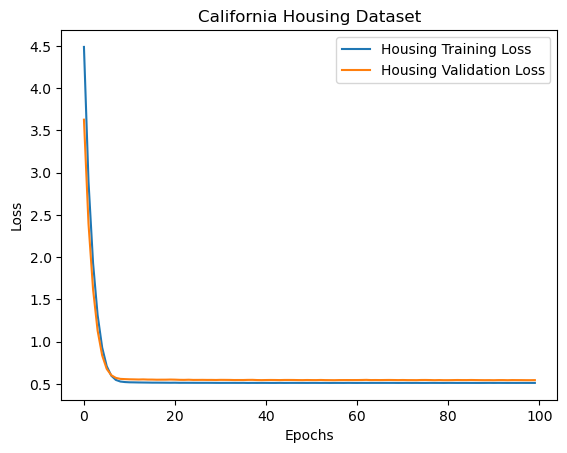

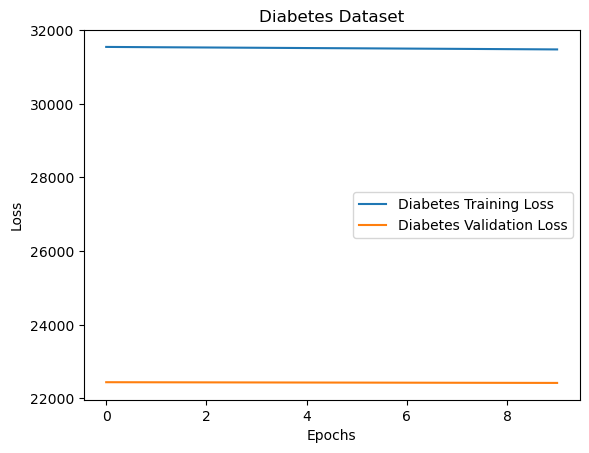

In [13]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the California Housing dataset
housing = fetch_california_housing()

# Split the California Housing dataset into features (X1) and target (y1)
X1 = housing.data
y1 = housing.target.reshape(-1, 1)  # Reshape to make it a column vector

# Load the Diabetes dataset
diabetes = load_diabetes()

# Split the Diabetes dataset into features (X2) and target (y2)
X2 = diabetes.data
y2 = diabetes.target.reshape(-1, 1)  # Reshape to make it a column vector

# Split the California Housing dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Split the Diabetes dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Standardize features for both datasets
scaler1 = StandardScaler()
X1_train = scaler1.fit_transform(X1_train)
X1_test = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)

# Define model for the California Housing dataset
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X1_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on California Housing dataset
history1 = model1.fit(X1_train, y1_train, epochs=100, batch_size=32, validation_split=0.2)

# Define model for the Diabetes dataset
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X2_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on Diabetes dataset
history2 = model2.fit(X2_train, y2_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate both models
loss1 = model1.evaluate(X1_test, y1_test)
print("California Housing Test Loss:", loss1)

loss2 = model2.evaluate(X2_test, y2_test)
print("Diabetes Test Loss:", loss2)

# Plot training and validation loss for California Housing dataset
plt.plot(history1.history['loss'], label='Housing Training Loss')
plt.plot(history1.history['val_loss'], label='Housing Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('California Housing Dataset')
plt.show()

# Plot training and validation loss for Diabetes dataset
plt.plot(history2.history['loss'], label='Diabetes Training Loss')
plt.plot(history2.history['val_loss'], label='Diabetes Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Diabetes Dataset')
plt.show()


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
Epoch 1/10
1079/1079 [==============================] - 3s 2ms/step - loss: 31336922.0000 - val_loss: 31768486.0000
Epoch 2/10
1079/1079 [==============================] - 2s 2ms/step - loss: 31298018.0000 - val_loss: 31728488.0000
Epoch 3/10
1079/1079 [==============================] - 2s 2ms/step - loss: 31259040.0000 - val_loss: 31688716.0000
Epoch 4/10
1079/1079 [==============================] - 2s 2ms/step - loss: 31219936.0000 - val_loss: 31648662.0000
Epoch 5/10
1079/1079 [==============================] - 2s 2ms/step - loss: 31180920.0000 - val_loss: 31608894

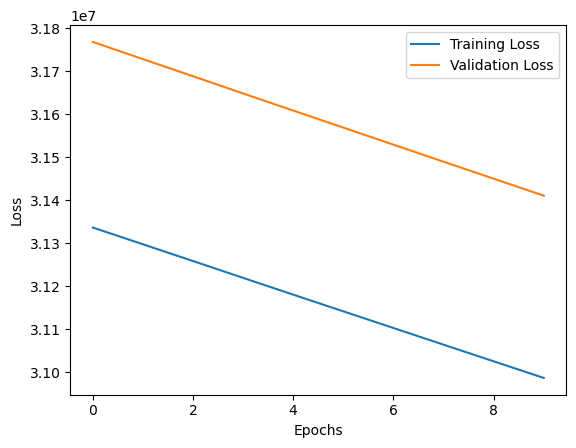

338/338 [==============================] - 1s 1ms/step


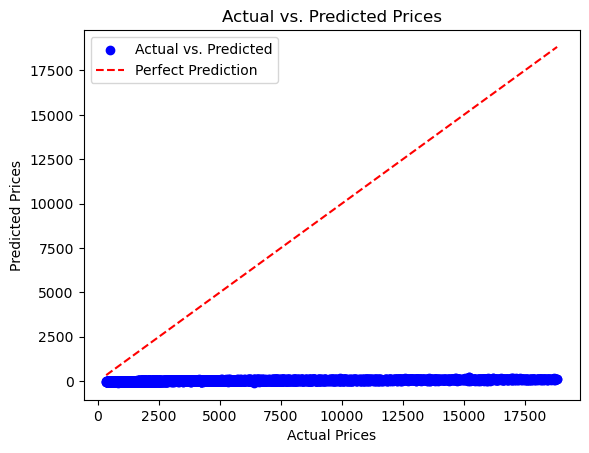

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Display the first few rows of the dataset
print(diamonds.head())

# Selecting features and target
X = diamonds.drop(['price'], axis=1)
y = diamonds['price'].values.reshape(-1, 1)

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['cut', 'color', 'clarity'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test)

# Plot actual vs. predicted values with different colors
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()


Epoch 1/100
1/1 [==============================] - 1s 852ms/step - loss: 109117.5391 - val_loss: 109622.9922
Epoch 2/100
1/1 [==============================] - 0s 73ms/step - loss: 109114.0625 - val_loss: 109630.9297
Epoch 3/100
1/1 [==============================] - 0s 75ms/step - loss: 109110.5859 - val_loss: 109638.8750
Epoch 4/100
1/1 [==============================] - 0s 75ms/step - loss: 109107.1016 - val_loss: 109646.8203
Epoch 5/100
1/1 [==============================] - 0s 65ms/step - loss: 109103.6328 - val_loss: 109654.7578
Epoch 6/100
1/1 [==============================] - 0s 78ms/step - loss: 109100.1562 - val_loss: 109662.7031
Epoch 7/100
1/1 [==============================] - 0s 73ms/step - loss: 109096.6641 - val_loss: 109670.6484
Epoch 8/100
1/1 [==============================] - 0s 61ms/step - loss: 109093.1875 - val_loss: 109678.5938
Epoch 9/100
1/1 [==============================] - 0s 46ms/step - loss: 109089.7109 - val_loss: 109686.5312
Epoch 10/100
1/1 [=========

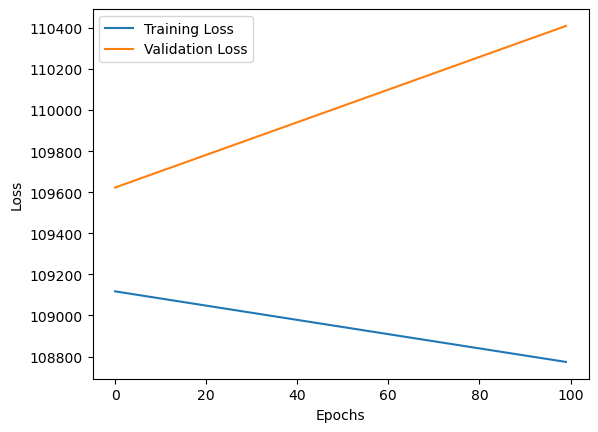

1/1 [==============================] - 0s 72ms/step


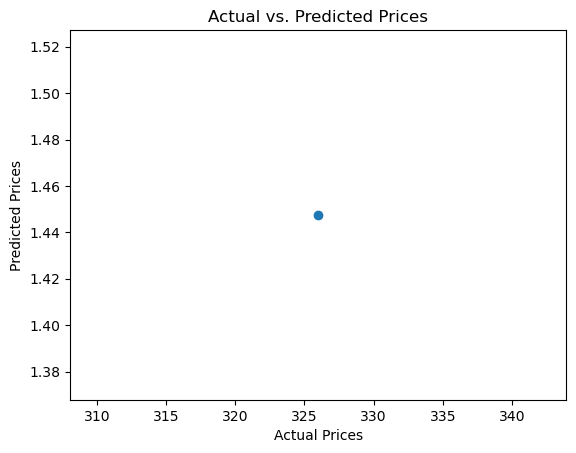

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load the new dataset
data = {
    'carat': [0.23, 0.21, 0.23, 0.29, 0.31],
    'cut': ['Ideal', 'Premium', 'Good', 'Premium', 'Good'],
    'color': ['E', 'E', 'E', 'I', 'J'],
    'clarity': ['SI2', 'SI1', 'VS1', 'VS2', 'SI2'],
    'depth': [61.5, 59.8, 56.9, 62.4, 63.3],
    'table': [55.0, 61.0, 65.0, 58.0, 58.0],
    'x': [3.95, 3.89, 4.05, 4.20, 4.34],
    'y': [3.98, 3.84, 4.07, 4.23, 4.35],
    'z': [2.43, 2.31, 2.31, 2.63, 2.75],
    'price': [326, 326, 327, 334, 335]
}
diamonds_df = pd.DataFrame(data)

# Convert categorical variables to numerical using one-hot encoding
diamonds_encoded = pd.get_dummies(diamonds_df, columns=['cut', 'color', 'clarity'])

# Select features and target
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price'].values.reshape(-1, 1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test_scaled)

# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


Epoch 1/10
1079/1079 [==============================] - 3s 3ms/step - loss: 31327264.0000 - val_loss: 31758178.0000
Epoch 2/10
1079/1079 [==============================] - 2s 2ms/step - loss: 31288006.0000 - val_loss: 31718292.0000
Epoch 3/10
1079/1079 [==============================] - 2s 2ms/step - loss: 31248996.0000 - val_loss: 31678344.0000
Epoch 4/10
1079/1079 [==============================] - 3s 2ms/step - loss: 31210036.0000 - val_loss: 31638512.0000
Epoch 5/10
1079/1079 [==============================] - 2s 2ms/step - loss: 31171230.0000 - val_loss: 31598966.0000
Epoch 6/10
1079/1079 [==============================] - 2s 2ms/step - loss: 31132340.0000 - val_loss: 31559074.0000
Epoch 7/10
1079/1079 [==============================] - 3s 2ms/step - loss: 31093472.0000 - val_loss: 31519462.0000
Epoch 8/10
1079/1079 [==============================] - 3s 2ms/step - loss: 31054746.0000 - val_loss: 31479864.0000
Epoch 9/10
1079/1079 [==============================] - 3s 2ms/step - lo

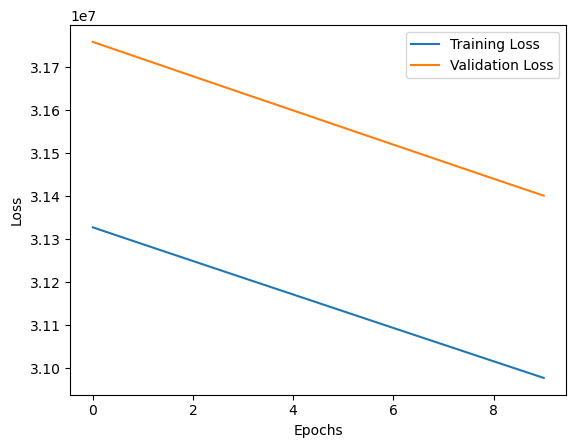

338/338 [==============================] - 1s 2ms/step


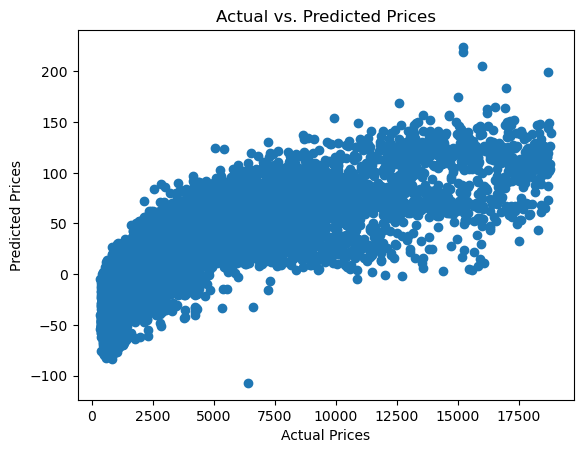

In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load the Diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Selecting features and target
X = diamonds.drop('price', axis=1)
y = diamonds['price'].values.reshape(-1, 1)

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['cut', 'color', 'clarity'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test_scaled)

# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()
